In [3]:
import pandas as pd
import seaborn as sns

#

In [4]:
df = pd.read_csv('Housing.csv')

In [5]:
df.sample(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
473,3003000,8050,2,1,1,yes,no,no,no,no,0,no,unfurnished
178,5229000,7085,3,1,1,yes,yes,yes,no,no,2,yes,semi-furnished
312,4098500,3600,3,1,1,yes,no,yes,no,yes,0,yes,furnished
382,3570000,3150,3,1,2,yes,no,yes,no,no,0,no,furnished
432,3290000,6060,3,1,1,yes,yes,yes,no,no,0,no,furnished
458,3115000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished
209,4900000,6720,3,1,1,yes,no,no,no,no,0,no,unfurnished
301,4200000,3520,3,1,2,yes,no,no,no,no,0,yes,semi-furnished
56,7343000,11440,4,1,2,yes,no,yes,no,no,1,yes,semi-furnished
151,5565000,4400,4,1,2,yes,no,no,no,yes,2,yes,semi-furnished


In [6]:
df.shape

(545, 13)

In [7]:

df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

# 1. Categorical Data
mainroad

guestroom

basement

hotwaterheater

airconditioning

prefarea

furnishingstatus

# Numerical Data
price

area

bathroom

bedroom

stories

parking

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [9]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [10]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [11]:
df['mainroad']=df['mainroad'].astype('category')
df['guestroom']=df['guestroom'].astype('category')
df['basement']=df['basement'].astype('category')




In [12]:
df.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   price             545 non-null    int64   
 1   area              545 non-null    int64   
 2   bedrooms          545 non-null    int64   
 3   bathrooms         545 non-null    int64   
 4   stories           545 non-null    int64   
 5   mainroad          545 non-null    category
 6   guestroom         545 non-null    category
 7   basement          545 non-null    category
 8   hotwaterheating   545 non-null    object  
 9   airconditioning   545 non-null    object  
 10  parking           545 non-null    int64   
 11  prefarea          545 non-null    object  
 12  furnishingstatus  545 non-null    object  
dtypes: category(3), int64(6), object(4)
memory usage: 44.7+ KB


In [13]:
for i in range(len(df['furnishingstatus'])):
    if df['furnishingstatus'][i] == "unfurnished":
        df['furnishingstatus'][i] = 0
    elif df['furnishingstatus'][i] == "semi-furnished":
        df['furnishingstatus'][i] = 1
    else:
        df['furnishingstatus'][i] = 2

/tmp/ipykernel_20444/1686464237.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['furnishingstatus'][i] = 2
/tmp/ipykernel_20444/1686464237.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['furnishingstatus'][i] = 1
/tmp/ipykernel_20444/1686464237.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['furnishingstatus'][i] = 0


In [14]:
for i in range(len(df['prefarea'])):
    if df['prefarea'][i] == "yes":
        df['prefarea'][i] = 1
    else:
        df['prefarea'][i] = 0

/tmp/ipykernel_20444/1419814670.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prefarea'][i] = 1
/tmp/ipykernel_20444/1419814670.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prefarea'][i] = 0


In [15]:
df['prefarea']=df['prefarea'].astype('category')
df['furnishingstatus']=df['furnishingstatus'].astype('category')

In [16]:
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,1,2
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,0,2
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,1,1
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,1,2
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,0,2
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,1,1
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,1,1
7,10150000,16200,5,3,2,yes,no,no,no,no,0,0,0
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,1,2
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,1,0


In [17]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


## a. Countplot

<AxesSubplot: xlabel='prefarea', ylabel='count'>

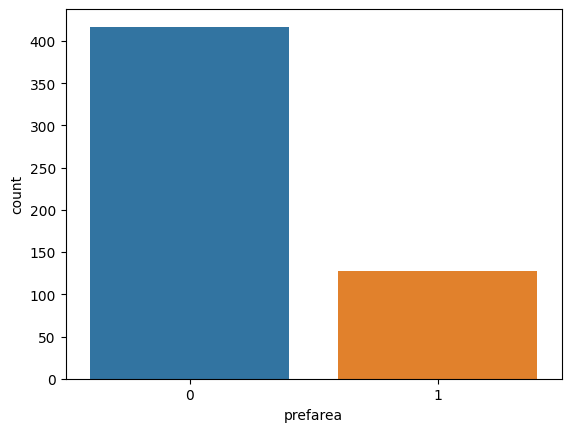

In [18]:
sns.countplot(x=df['prefarea'])

<AxesSubplot: >

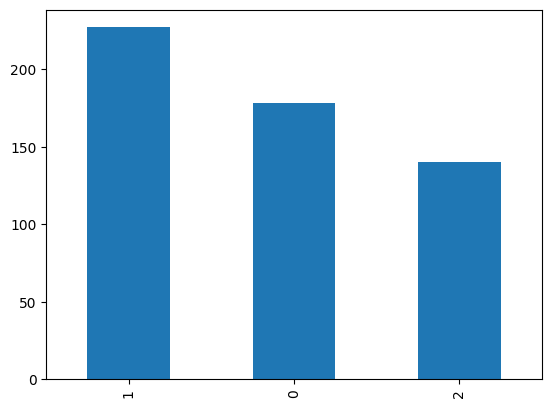

In [19]:
#sns.countplot(df["Pclass"])
df['furnishingstatus'].value_counts().plot(kind='bar')


## b. PieChart

<AxesSubplot: ylabel='hotwaterheating'>

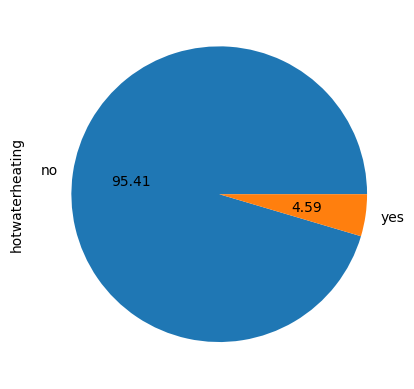

In [20]:
df['hotwaterheating'].value_counts().plot(kind='pie',autopct='%.2f')

<AxesSubplot: ylabel='airconditioning'>

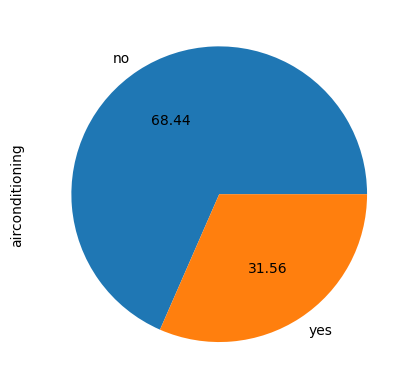

In [21]:
df['airconditioning'].value_counts().plot(kind='pie',autopct='%.2f')

<div style="border-top:black 2px solid"></div>

# 2. Numerical Data

## a. Histogram

(array([100., 212., 119.,  67.,  30.,  11.,   2.,   4.]),
 array([ 1750000.,  3193750.,  4637500.,  6081250.,  7525000.,  8968750.,
        10412500., 11856250., 13300000.]),
 <BarContainer object of 8 artists>)

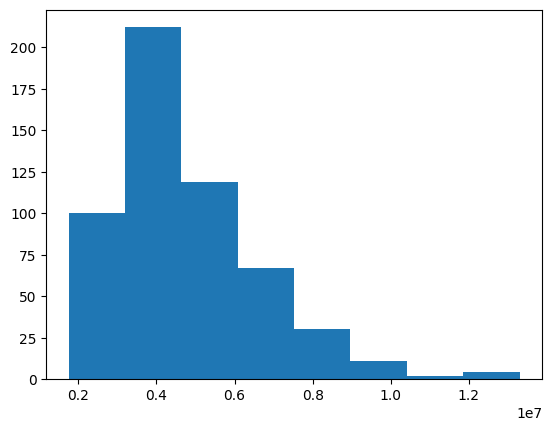

In [22]:
import matplotlib.pyplot as plt
plt.hist(df['price'],bins=8)

## 1. Scatterplot (Numerical - Numerical)

<AxesSubplot: xlabel='price', ylabel='area'>

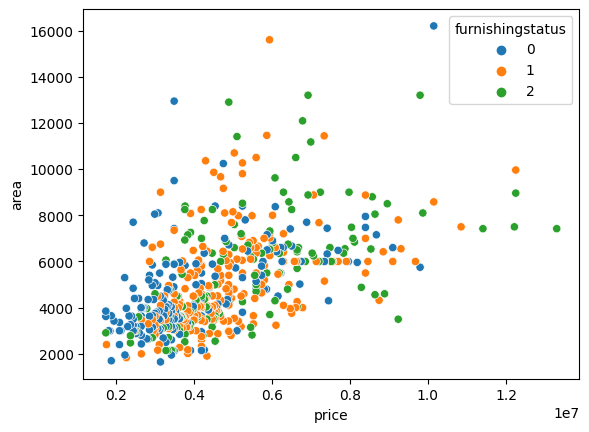

In [23]:
sns.scatterplot(x = df['price'],y = df['area'], hue=df['furnishingstatus'])

## 2. Bar Plot (Numerical - Categorical)

<AxesSubplot: xlabel='airconditioning', ylabel='price'>

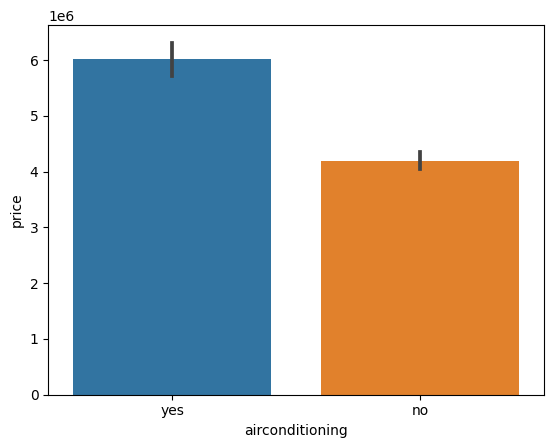

In [24]:
sns.barplot(y=df['price'], x=df['airconditioning'],)

<AxesSubplot: xlabel='hotwaterheating', ylabel='price'>

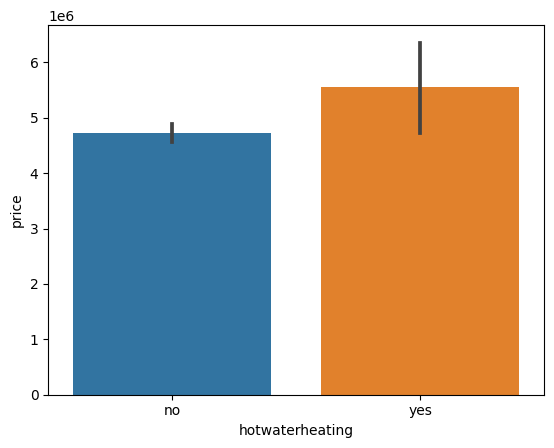

In [25]:
sns.barplot(y=df['price'], x=df['hotwaterheating'],)

## 3. Pairplot

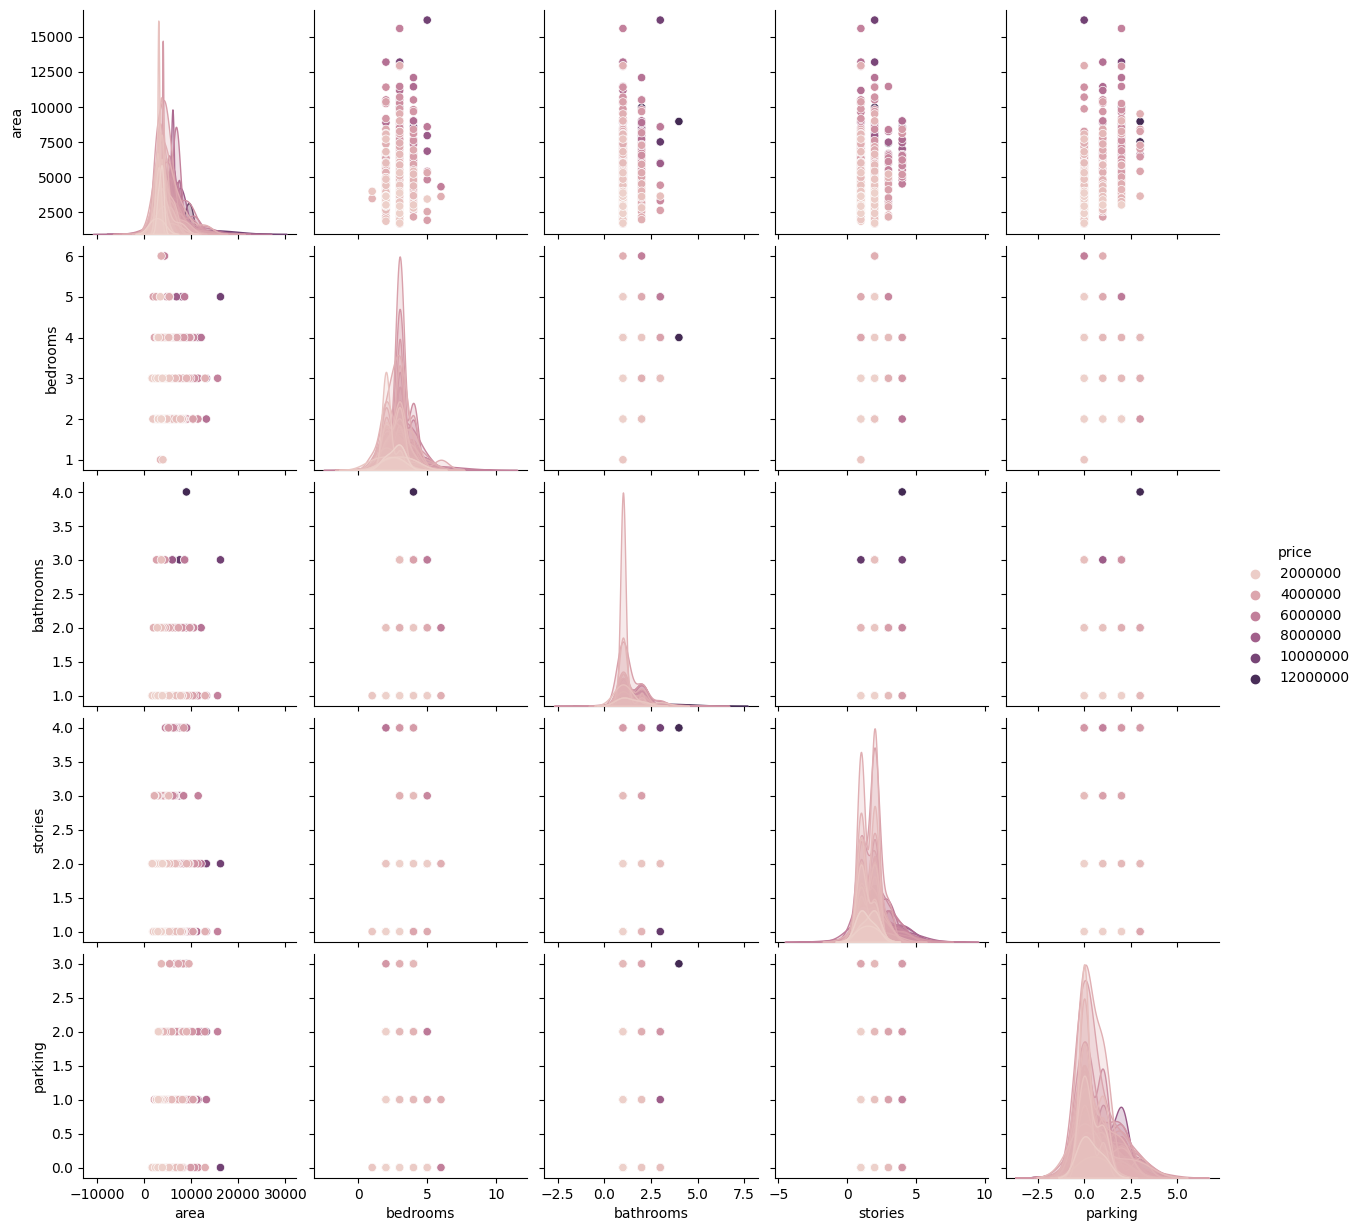

In [26]:
sns.pairplot(df,hue='price')